# 2.155/6 Challenge Problem 2
<font size="1">
  Created by L. Regenwetter in Oct. 2023;   Artwork by Jessica Shung. </font>

In [1]:
# !git clone https://github.com/Lyleregenwetter/CP2_2023_public.git
# %cd CP2_2023_public/

In [2]:
from utils_public import *
import numpy as np
import pandas as pd

# Overview
In this challenge problem, you've been hired as an urban planner for an urban development project in budding city. The city is rapidly expanding and has a large area that they are looking to zone. The mayor has asked you to consult with several of their advisors to figure out an optimal zoning strategy. These advisors are an interesting bunch. Though they mean well, they are somewhat biased towards their own areas of expertise. Pleasing all of them will be tricky!

## Let's meet the advisors:
**The Wellness Advisor:** With a background in the parks & rec department of the city government, the wellness advisor is focused on the health and wellbeing (both physical and mental) of citizens. Among other things, they are very invested in the quality and accessibility of city's green spaces.

**The Tax Advisor:** With a background in the revenue department of the city government, the tax advisor is focused on balancing city expenditures with income and keeping the city's economy afloat. Among other things, they are invested in maximizing property value and reducing city expenditures.  

**The Transportation Advisor**: As a former executive in the local public transportation authority, the transportation advisor places an emphasis on accessibility and emissions. Among other objectives, they are focused on mimizing the distance over which the workforce needs to commute.

**The Business advisor:** As a professor emeritus of economics at the state college in the city, the economic advisor is fixated on the general economic prosperity of the city's businesses and inhabitants. Among other things, they prioritize the overall economic output of the city.

## Understanding City Zoning:
Cities are often comprised of districts. Typically, the city government zones areas allowing them some amount of control over what goes on in each distict. To simplify, we will be represing city districts as discrete spaces in a 7x7 grid. Each grid space will be filled with exactly one of five types of zones. We will discuss the districts below:

**Residential Zones [0]:** Residential zones are comprised primarily of housing and are where the workforce lives

**Industrial Zones [1]:** Industrial zones are the manufacturing centers of the city, packed with factories producing food and goods.

**Commercial Zones [2]:** Commercial zones are the retail hubs of the city, consisting of markets, stores, and restaurants.

**Park Zones [3]:** City parks are the green spaces of the city -- small tastes of nature within an urban environment.

**Office Zones [4]:** Office zones are the enterprise centers of global corporations and local businesses alike.

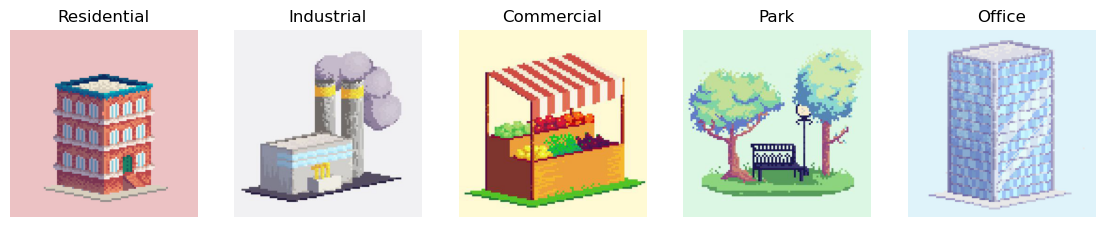

In [3]:
plot_districts()

## The Data
The mayor has provided you access to a large dataset of 500,000 possible zoning configurations. Additionally, the mayor asked the advisors to score some of these zoning configurations according to their subjective opinions of efficacy. Since the advisors are "only human" they have only been able to label ~5,000 configurations each. Some of their assessments may seem questionable to you, but they mayor insists that the advisors are "experts" and their ratings should not be questioned.

Let's take a look at the data. First, lets have a look at the zoning layouts you are given.

In [4]:
grids = load_grids() #Helper function we have provided to load the grids from the dataset
grids.shape #Check shape

(500000, 7, 7)

Let's examine the first grid in the dataset. It consists of 7x7 entries, each ranging from 0 to 4. The entries denote the district occupying the grid space (labeled above).

In [5]:
grids[0]

array([[4., 3., 0., 2., 3., 4., 4.],
       [0., 2., 0., 4., 3., 0., 3.],
       [4., 1., 0., 0., 1., 0., 3.],
       [2., 1., 2., 1., 3., 1., 1.],
       [2., 2., 2., 2., 4., 2., 3.],
       [2., 0., 0., 2., 0., 1., 0.],
       [4., 2., 4., 1., 3., 2., 4.]])

Let's visualize some of these grids. We have provided some utilities, mainly fucused on visualization, which we imported at the top of the notebook.

<Figure size 640x480 with 0 Axes>

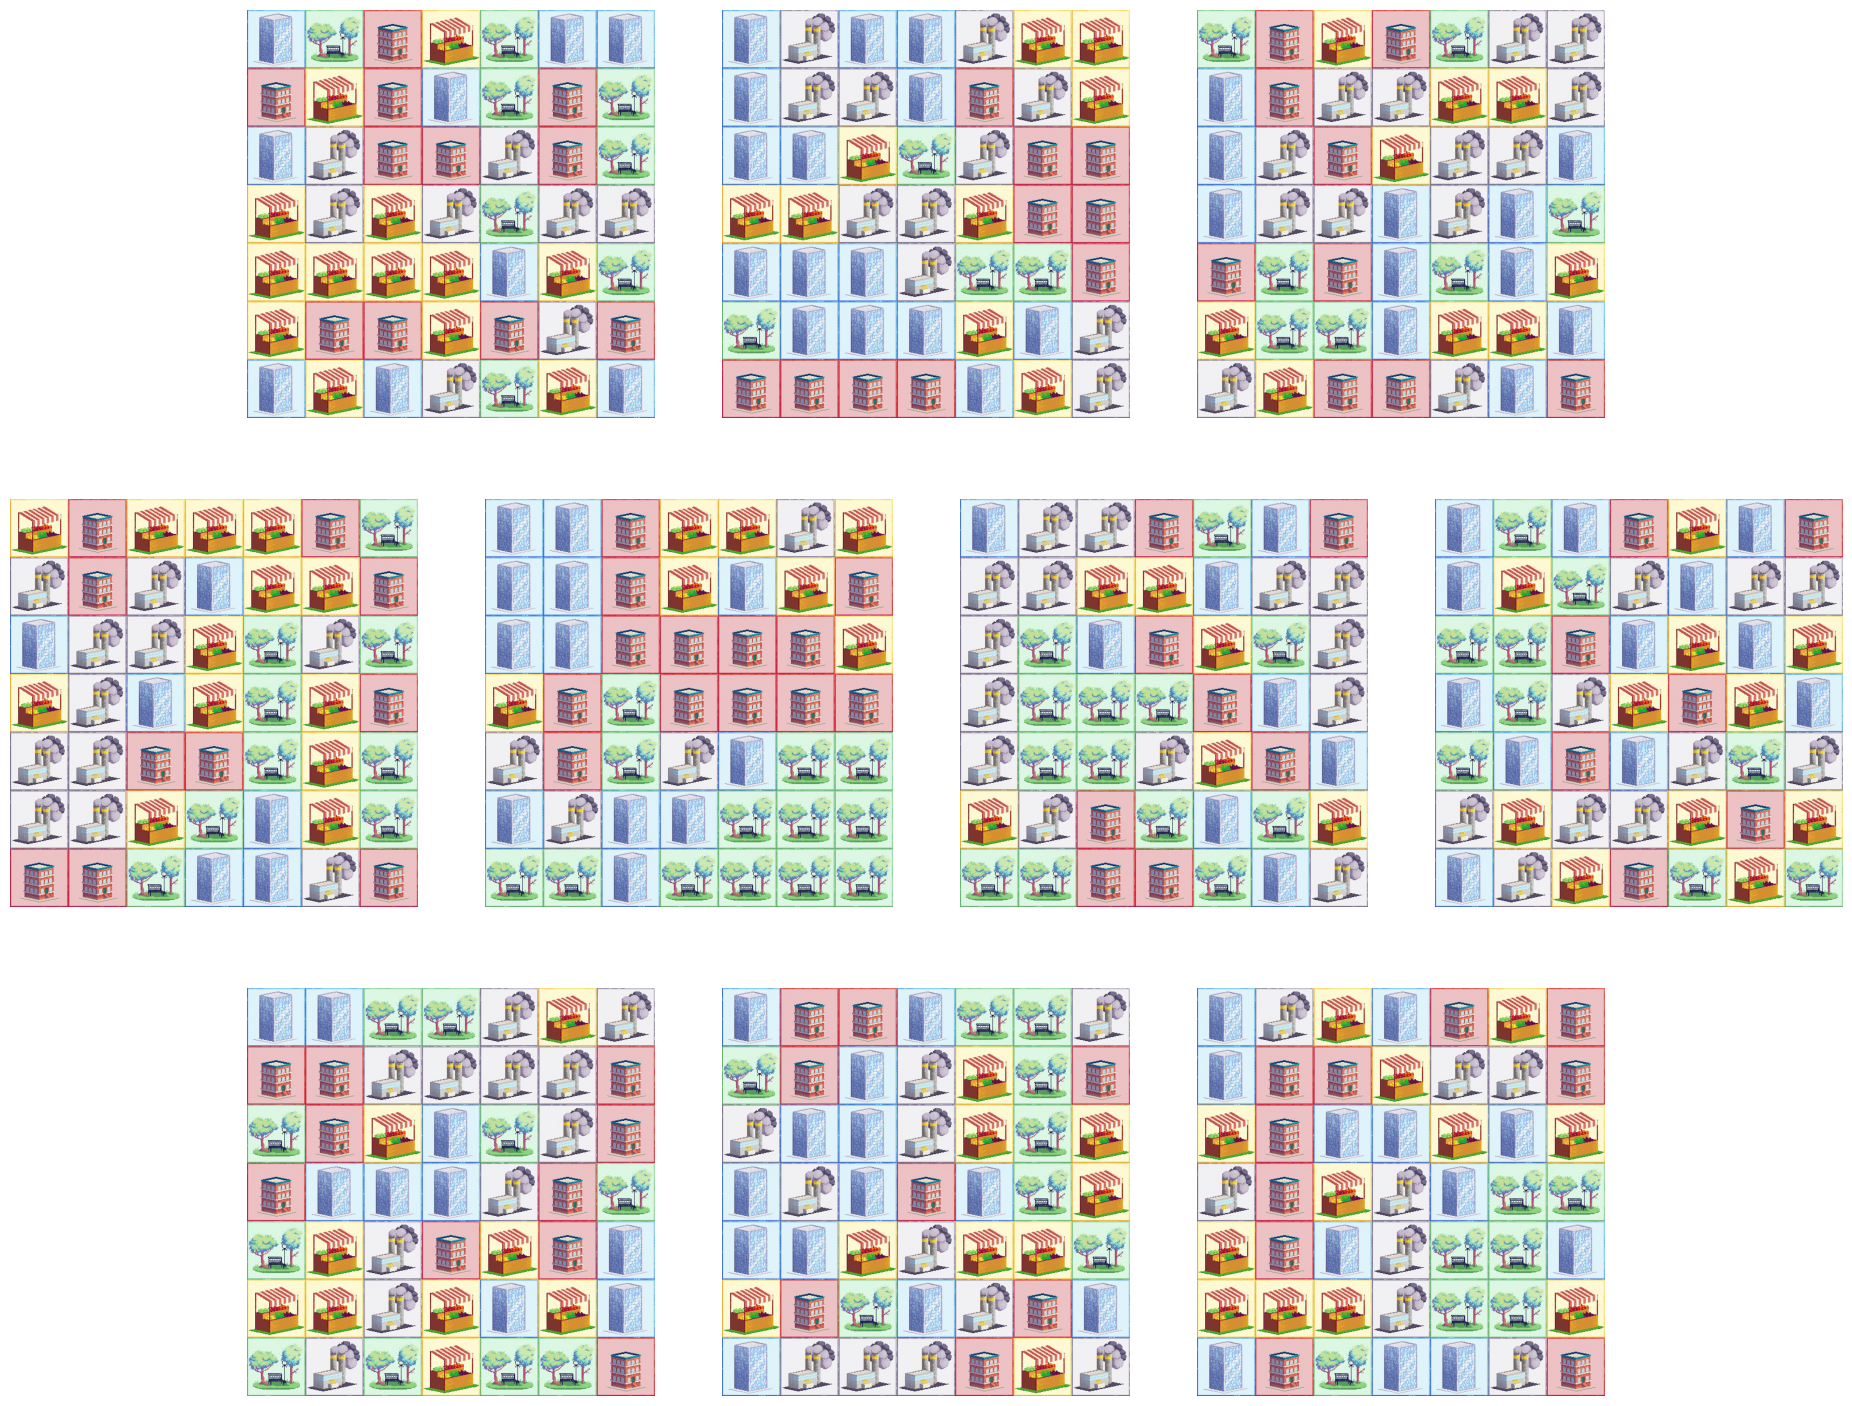

In [6]:
plot_n_grids(grids[:10]) #Plotting function that plots some number of grids in a clean layout

Now lets have a look at the advisor scores:

In [7]:
ratings = np.load("datasets/scores.npy") #Load advisor scores
score_order = ["Wellness", "Tax", "Transportation", "Business"] #This is the order of the scores in the dataset
ratings_df = pd.DataFrame(ratings, columns = score_order) #Create a dataframe
display(ratings_df) #Print dataframe

Wellness  Tax  Transportation  Business
0            NaN  NaN             NaN       NaN
1            NaN  NaN             NaN       NaN
2            NaN  NaN             NaN       NaN
3            NaN  NaN             NaN       NaN
4            NaN  NaN             NaN       NaN
...          ...  ...             ...       ...
499995       NaN  NaN             NaN       NaN
499996       NaN  NaN             NaN       NaN
499997       NaN  NaN             NaN       NaN
499998       NaN  NaN             NaN       NaN
499999       NaN  NaN             NaN       NaN

[500000 rows x 4 columns]

We can see that the vast majority of ratings are NaN. After all, only 1% of the data is labeled. Let's confirm that there are the right number of NaNs in each column:

In [8]:
ratings_df.isna().sum()

Wellness          495001
Tax               495002
Transportation    495001
Business          495000
dtype: int64

Let's plot the distribution over the scores that are rated. We see that each advisor's scores are fairly uniform from 0 to 1.

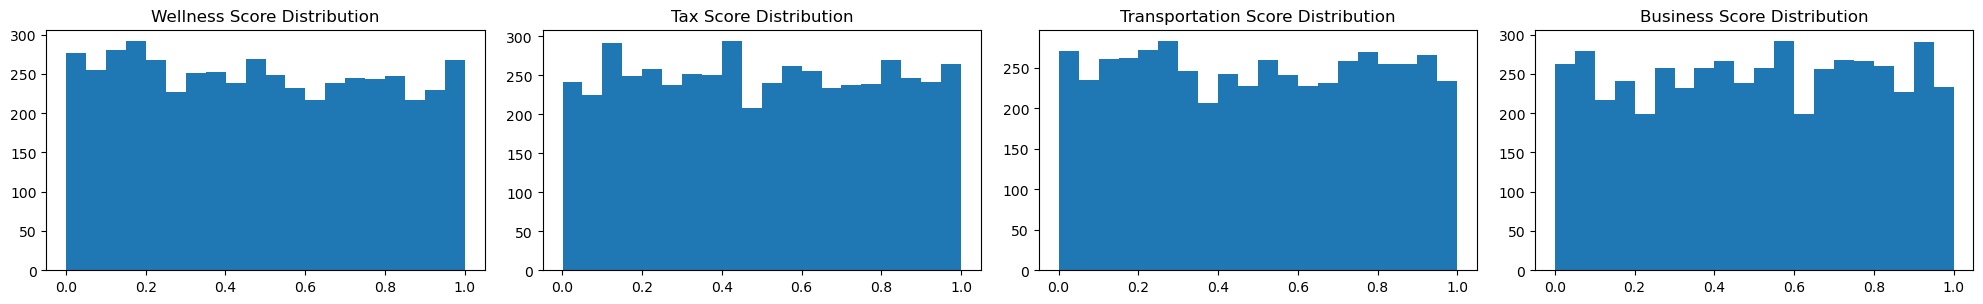

In [9]:
plot_ratings_histogram(ratings)

## The Task:
**Satisfying the Advisors:**
You are tasked with finding zoning layouts that "satisfy" all four advisors, meaning that they each assign a score of at least 0.85. If even one of the advisors rates a layout under a 0.85, it will be rejected as a candidate. You much identify designs from the dataset or generate new designs that *you believe* will be accepted by the advisors.

**Identifying a diverse set:** The mayor has asked for a variety of "diverse" design candidates -- 100 city layouts to be exact -- which they will show to the advisors. The overall diversity of all valid (non-rejected) designs will be calculated. With this diversity metric, more designs is always better, so it is in your best interest to ensure that as few of your submitted designs are rejected as possible.

We have provided the function we will use to evaluate diversity. Here are a few tests to build some intuition with the diversity score.

### Building Intuition for Diversity

In [10]:
diversity_score(grids[:100]) #Diversity of the first 100 grids in the dataset

0.7989527932385075

In [11]:
#If we set the top left corner to 0 in all grids, the diversity score should go down
g_1 = grids.copy()
g_1[:,0,0] = 0
diversity_score(g_1[:100])

0.78281179138322

In [12]:
#If some grids are the same, the diversity score should go down
g_2 = grids.copy()
g_2[0] = g_2[1]
diversity_score(g_2[:100])

0.7829066171923315

In [13]:
#If we submit fewer grids, the diversity score should go down (as will occur if invalid designs are submitted)
diversity_score(g_2[:99]) #Diversity of the first 99 grids in the dataset

0.7669923727066584

<Figure size 640x480 with 0 Axes>

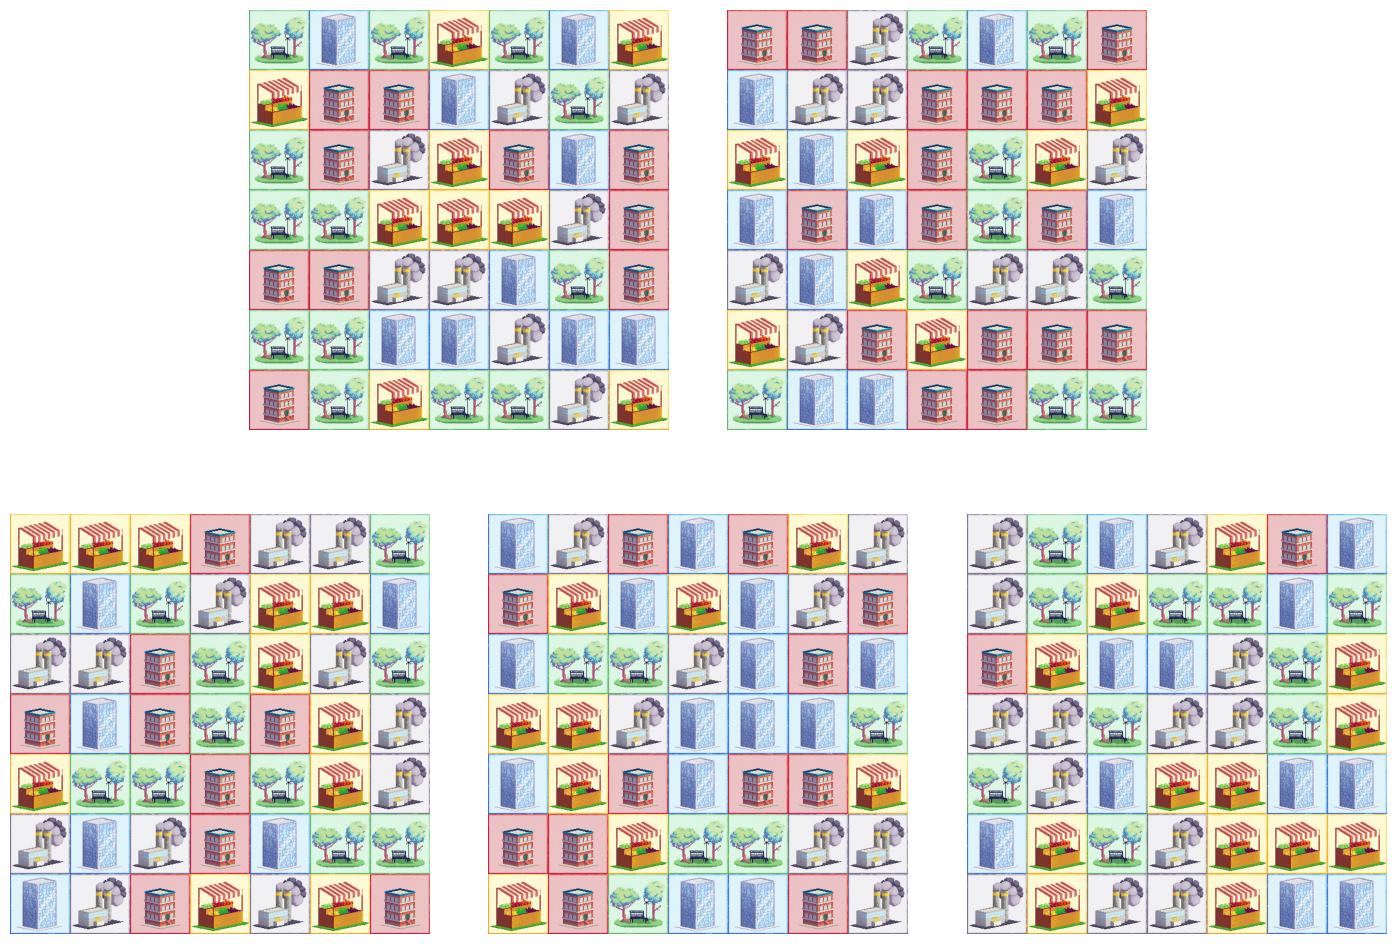

Diversity Score: 1.0


In [14]:
# A diverse set of five grids where no two cities have the same type of district in the same grid space
diverse_set = np.random.rand(5,7,7).argsort(0)
plot_n_grids(diverse_set)
print(f"Diversity Score: {diversity_score(diverse_set, 5)}")


<Figure size 640x480 with 0 Axes>

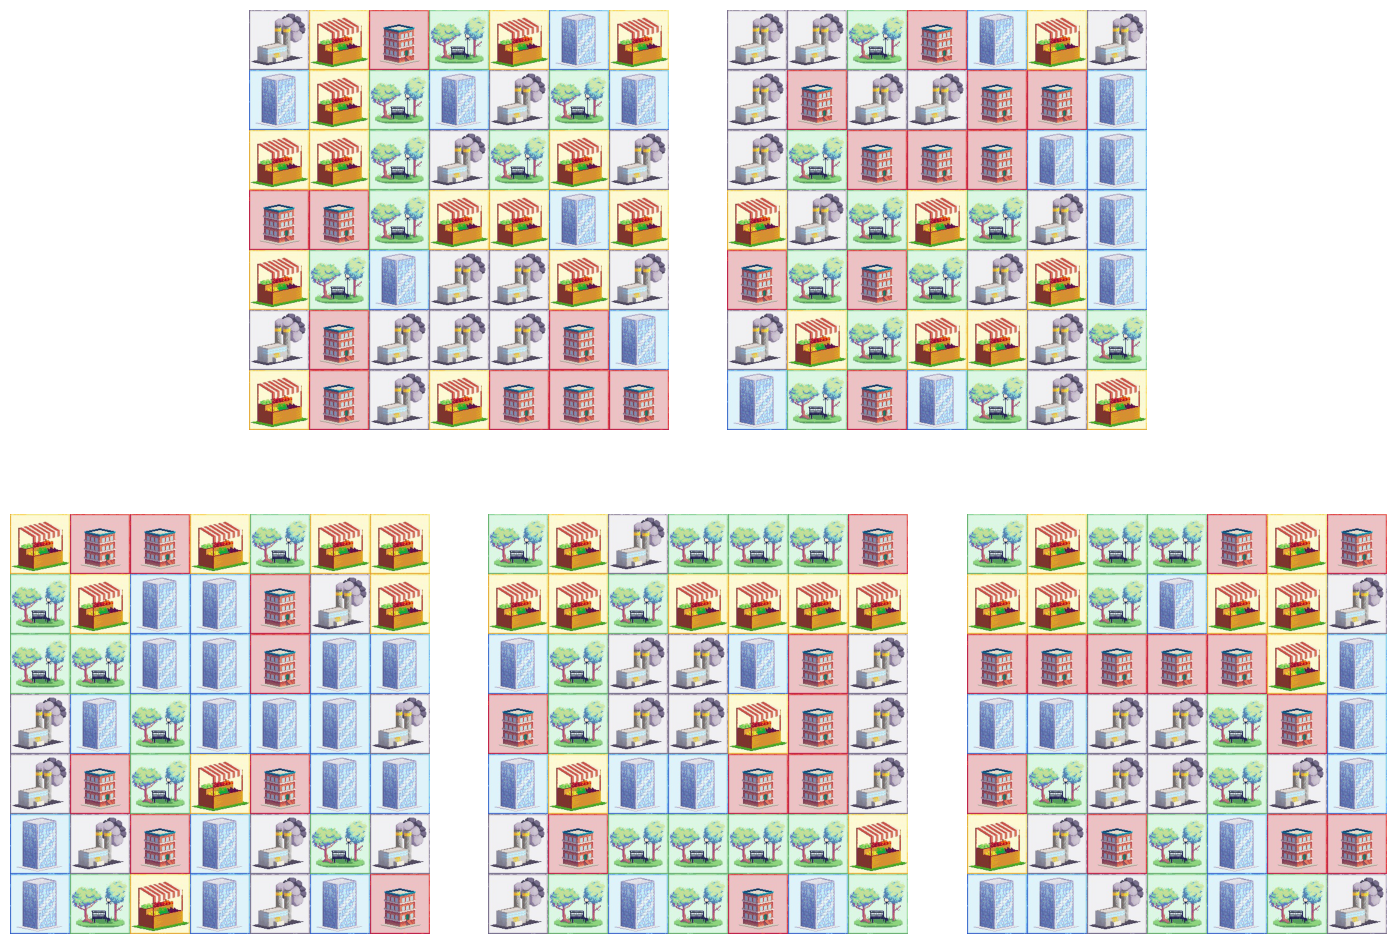

Diversity Score: 0.7979591836734694


In [15]:
#set of 5 grids where each district is independent and random with 20% probability for each district
random_set = np.random.randint(0,5, size=(5,7,7))
plot_n_grids(random_set)
print(f"Diversity Score: {diversity_score(random_set, 5)}")

<Figure size 640x480 with 0 Axes>

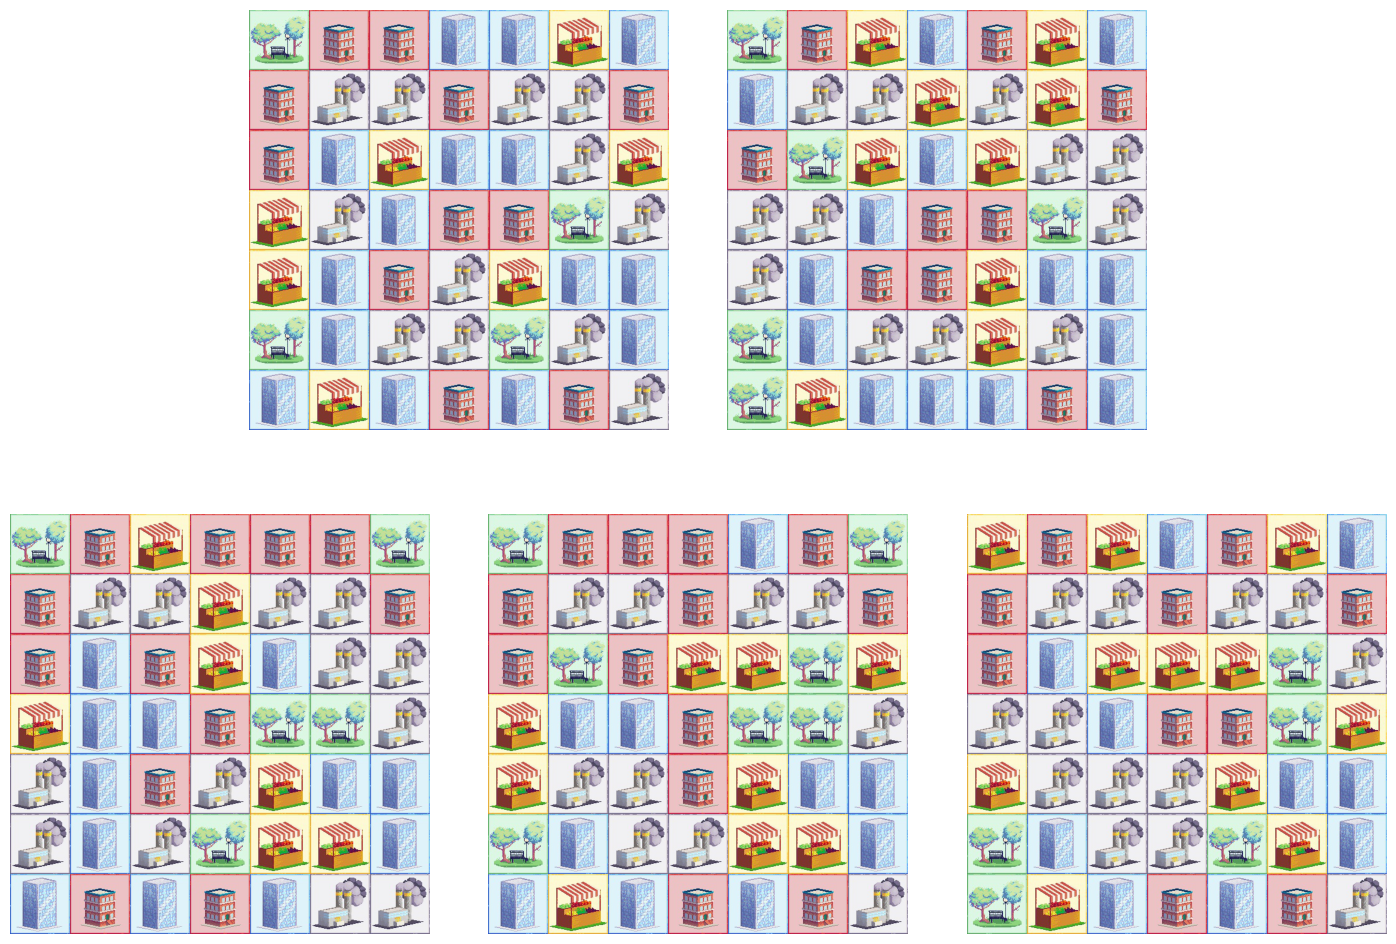

Diversity Score: 0.3510204081632653


In [16]:
#Set of five grids where each grid space only takes one of two types across all cities
r1 = np.random.randint(0,5,size=(7,7))
r2 = np.random.randint(0,5,size=(7,7))
mask = np.random.randint(0,2,size=(5,7,7))
non_diverse_set = r1 * mask + r2 * (1-mask)
plot_n_grids(non_diverse_set)
print(f"Diversity Score: {diversity_score(non_diverse_set, 5)}")

Assuming that all designs in your submitted sets are valid, you will be able to *exactly calculate* the diversity of your submitted sets.

# Your Code

Time to get coding! We recommend you start by training some regressors to predict the advisor scores. From there, it's up to you to generate or select city designs that you think will satisfy the requirements!

###Hints:
1. The advisors pay a lot of attention to the **adjacency** of districts as well as the **distances** from certain types of districts to others.
2. This is a grid-structured city. What **distance metric** is appropriate?
3. Though adding **novel** varied designs to your final set will increase the diversity score most, **duplicates** of valid designs will still slightly increase the diversity score, whereas invalid designs will not (see utils function for exact calculation).



##Training Regressors
We have provided code to train a simple AutoML regressor from AutoGluon that predicts advisor scores.


First, lets install autogluon:

In [17]:
!pip install autogluon

We provided a small helper function that grabs the labeled subset of the dataset for some advisor:

In [18]:
grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,0]) #gets subset of the dataset rated by advisor 0
print(grids_subset.shape)
print(ratings_subset.shape)

(4999, 7, 7)
(4999,)


BEFORE FLATTENING THE ARRAY
We want to keep the spatial information. Especially:

*   the distance of each district to the other 4 nearest districts using Linfinite Norm
*   the districts of the neighbors, and more especially the summ of number of neighboring districts of each sort
*   (the size of the current zone of same district)





Eloi:


1.   Ajouter somme nombre de tiles pour chaque district
2.   Taille des clusters: prendre 10 clusters max pour residential (pour garantir la taille fixe du vecteur)
Pour compter la taille du cluster: avoir un masque qui détermine si case visitée. Parcourir toutes les cases, et dès qu'on croise la case d'intéret, on ajoute les voisins dans une liste d'attente à vérifier.



In [19]:
import numpy as np

def calculate_distances_to_neighbors(grid_size, num_districts, grid):

    district_assignments = grid

    # Function to calculate distances to neighboring districts
    def calculate_distances(row, col):
        district = district_assignments[row, col]
        distances = []
        # sum neighbors counts the number of neighboring districts for one district
        sum_neighbors = np.zeros(5) # [0,0,0,0,0]

        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue  # Skip the current cell
                new_row, new_col = row + i, col + j

                if 0 <= new_row < grid_size and 0 <= new_col < grid_size:
                    neighbor_district = district_assignments[new_row, new_col]
                    # print("HERE")
                    # print(neighbor_district)
                    # print(int(neighbor_district))
                    sum_neighbors[int(neighbor_district)]+=1
                    # if neighbor_district != district:
                    distance = max(abs(i), abs(j)) # Chebyshev distance = Linf Norm
                    distances.append((neighbor_district, distance))

        return distances, sum_neighbors

    # Calculate distances to neighbors for each cell
    district_distances = {}
    district_distances_flatten = np.zeros((7,7,5))

    for row in range(grid_size):
        for col in range(grid_size):
            distances, sum_neighbors = calculate_distances(row, col)
            district_distances[(row, col)] = sum_neighbors #distances, sum_neighbors
            #performance-wise: i think we can flatten this part np.reshape
            for count, dist in enumerate(sum_neighbors):
              district_distances_flatten[row][col][count] = dist

    return district_assignments, district_distances, district_distances_flatten


In [20]:
# Example usage for the first grid element:
grid_size = 7
num_districts = 5
assignments, distances, distances_flatten = calculate_distances_to_neighbors(grid_size, num_districts, grids_subset[0])
# One list of size 245
distances_flatten = distances_flatten.flatten()

# Print district assignments and distances
print("District Assignments:")
print(assignments)
print("\nDistances to Neighbors:")
for position, neighbor_distances in distances.items():
    print(f"District at position {position}: {neighbor_distances}")
print(distances_flatten)

District Assignments:
[[0. 4. 0. 3. 3. 1. 4.]
 [3. 3. 0. 0. 0. 3. 4.]
 [3. 1. 2. 3. 2. 2. 3.]
 [0. 2. 2. 1. 2. 1. 4.]
 [1. 3. 1. 0. 2. 2. 3.]
 [1. 4. 0. 3. 0. 0. 1.]
 [2. 2. 2. 0. 3. 1. 3.]]

Distances to Neighbors:
District at position (0, 0): [0. 0. 0. 2. 1.]
District at position (0, 1): [3. 0. 0. 2. 0.]
District at position (0, 2): [2. 0. 0. 2. 1.]
District at position (0, 3): [4. 0. 0. 1. 0.]
District at position (0, 4): [2. 1. 0. 2. 0.]
District at position (0, 5): [1. 0. 0. 2. 2.]
District at position (0, 6): [0. 1. 0. 1. 1.]
District at position (1, 0): [1. 1. 0. 2. 1.]
District at position (1, 1): [3. 1. 1. 2. 1.]
District at position (1, 2): [2. 1. 1. 3. 1.]
District at position (1, 3): [3. 0. 2. 3. 0.]
District at position (1, 4): [1. 1. 2. 4. 0.]
District at position (1, 5): [1. 1. 2. 2. 2.]
District at position (1, 6): [0. 1. 1. 2. 1.]
District at position (2, 0): [1. 1. 1. 2. 0.]
District at position (2, 1): [2. 0. 3. 3. 0.]
District at position (2, 2): [2. 2. 2. 2. 0.]
Di

In [21]:
print(grids_subset[0])

[[0. 4. 0. 3. 3. 1. 4.]
 [3. 3. 0. 0. 0. 3. 4.]
 [3. 1. 2. 3. 2. 2. 3.]
 [0. 2. 2. 1. 2. 1. 4.]
 [1. 3. 1. 0. 2. 2. 3.]
 [1. 4. 0. 3. 0. 0. 1.]
 [2. 2. 2. 0. 3. 1. 3.]]


In [22]:
# Unefficient way to loop across the samples
n=grids_subset.shape[0]
distances_subset = np.zeros((n, distances_flatten.shape[0]))

for i in range(n):
  assignments, distances, distances_flatten = calculate_distances_to_neighbors(grid_size, num_districts, grids_subset[i])
  # One list of size 245
  distances_flatten = distances_flatten.flatten()
  for j in range(distances_flatten.shape[0]):
    distances_subset[i][j] = distances_flatten[j]

print(distances_subset.shape)
print(distances_subset)
print(grids_subset[0])

(4999, 245)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 2. 0. 0.]
 [1. 1. 0. ... 0. 1. 2.]
 ...
 [0. 2. 0. ... 1. 1. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [1. 2. 0. ... 0. 0. 1.]]
[[0. 4. 0. 3. 3. 1. 4.]
 [3. 3. 0. 0. 0. 3. 4.]
 [3. 1. 2. 3. 2. 2. 3.]
 [0. 2. 2. 1. 2. 1. 4.]
 [1. 3. 1. 0. 2. 2. 3.]
 [1. 4. 0. 3. 0. 0. 1.]
 [2. 2. 2. 0. 3. 1. 3.]]


Here we decide to add a distance feature, with the L1 norm. It checks the size of the clusters of a same district. We want to appy it for parks (and maybe for residential areas)

In [23]:
def add_neighbours(mat, mask, i,j, district_index):
    neighbours_to_check = []
    n = mat.shape[0]

    # Define the possible directions to move in L1 norm
    directions = [(0,0),(1, 0), (-1, 0), (0, 1), (0, -1)]
    for dr, dc in directions:
        k1 = min(max(0,i+dr), n-1)
        l1 = min(max(0,j+dc), n-1)
    # # Version for Linfinite norm
    # for k in range(-1,2):
    #     k1 = min(max(0,i+k), n-1)
    #     for l in range(-1,2):
    #         l1 = min(max(0,j+l), n-1)
        if mask[k1][l1] == 0:
            mask[k1][l1] = 1
            if mat[k1][l1] == district_index:
                neighbours_to_check.append([k1,l1])
    return neighbours_to_check, mask

def search_clusters(mat, n_clusters, district_index):
    mask = np.zeros(mat.shape)
    cluster = np.zeros(n_clusters)
    n = mat.shape[0]
    cluster_ind = 0
    for i in range(n):
        for j in range(n):
            neighbours_to_check = []
            if mask[i][j] == 0:
                mask[i][j] == 1
                if mat[i][j] == district_index:
                    neighbours_to_check, mask2 = add_neighbours(mat, mask, i, j, district_index)
                    mask = mask2
                    while len(neighbours_to_check) > 0:
                        cluster[cluster_ind] += 1
                        neigh = neighbours_to_check.pop()
                        i1, j1 = neigh[0], neigh[1]
                        new_neighbours, mask2 = add_neighbours(mat, mask, i1, j1, district_index)
                        mask = mask2
                        neighbours_to_check = neighbours_to_check + new_neighbours
                    cluster_ind += 1
                    if cluster_ind >= n_clusters:
                        return cluster
    return cluster

In [24]:
n_clusters = 10

def district_clusters(mat_set, district):
  park_sum = np.zeros((mat_set.shape[0], n_clusters))
  for i, grd in enumerate(mat_set):
    park_clusters = search_clusters(grd, n_clusters, district_index=district)
    for j, size in enumerate(park_clusters):
      park_sum[i][j] = size
  return park_sum

park_clusters_sum = district_clusters(grids_subset, district=3)
residential_clusters_sum = district_clusters(grids_subset, district=0)


We evaluate the sum of the number of tiles of each district

In [25]:
def sum_tiles(mat_set):
  tiles_sum = np.zeros((mat_set.shape[0],5))
  for i, grd in enumerate(mat_set):
    for district in range(5):
      count = np.count_nonzero(grd == district)
      tiles_sum[i][district] = count
  return tiles_sum

tiles_sum = sum_tiles(grids_subset)
# print(grids_subset[0])
# print(tiles_sum[:10])

Here we evaluate the distance of one type of district to the others

In [26]:
def get_xy_districts(grid, district):
  district_x, district_y = np.where(grid==district)
  # Combine x and y coordinates into a NumPy array
  district_xy = np.array(list(zip(district_x,district_y)))
  return district_xy

from scipy.spatial.distance import cdist
def avg_distance(grid, district_a, district_b):
  district_a_xy = get_xy_districts(grid, district_a)
  district_b_xy = get_xy_districts(grid, district_b)
  if district_a_xy.size == 0 or district_b_xy.size == 0:
    d_ab_avg = 20
  else:
    d_ab_mat = cdist(district_a_xy, district_b_xy,'cityblock')
    # For each residential unit, we want the shortest distance to the park
    d_ab = np.min(d_ab_mat, axis=1)
    d_ab_avg = np.mean(d_ab)
  return d_ab_avg

def avg_distance_mod(grid, district_a, district_b):
  district_a_xy = get_xy_districts(grid, district_a)
  district_b_xy = get_xy_districts(grid, district_b)
  if district_a_xy.size == 0 or district_b_xy.size == 0:
    d_ab_avg = 20
  else:
    d_ab_mat = cdist(district_a_xy, district_b_xy,'cityblock')
    # For each residential unit, we want the shortest distance to the park
    # d_ab = np.min(d_ab_mat, axis=1)
    d_ab_avg = np.mean(d_ab_mat)
  return d_ab_avg

  

# distance residential to all
def avg_dist_res_all(mat_set):
  avg_dist_residential_all = np.zeros((mat_set.shape[0],4))
  for i, grd in enumerate(mat_set):
    for j in range(1,5):
      # if j == 3: #for park case
      #   d_residential_j_avg = avg_distance(grd, district_a=0, district_b=j)
      # else:
      d_residential_j_avg = avg_distance_mod(grd, district_a=0, district_b=j)

      avg_dist_residential_all[i][j-1]= d_residential_j_avg
  return avg_dist_residential_all


avg_dist_residential_all = avg_dist_res_all(grids_subset)
np.shape(avg_dist_residential_all)
# print(grids_subset[0])

(4999, 4)

In [27]:
np.array([1,2,3])

array([1, 2, 3])

In [28]:
print(grids[:1])

[[[4. 3. 0. 2. 3. 4. 4.]
  [0. 2. 0. 4. 3. 0. 3.]
  [4. 1. 0. 0. 1. 0. 3.]
  [2. 1. 2. 1. 3. 1. 1.]
  [2. 2. 2. 2. 4. 2. 3.]
  [2. 0. 0. 2. 0. 1. 0.]
  [4. 2. 4. 1. 3. 2. 4.]]]


In [29]:
np.sum(grids[:1] == 0)

11

In [30]:
A = np.zeros((2,3))
print(A)
A[0] = np.array([1,2,3])
print(A)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 2. 3.]
 [0. 0. 0.]]


In [31]:
def get_district_resident_ratio(mat_set):
    resident_ratio = np.zeros((mat_set.shape[0],3))
    for i, grd in enumerate(mat_set):
        cat0 = np.sum(grd == 0)
        cat1 = np.sum(grd == 1)
        cat2 = np.sum(grd == 2)
        cat3 =np.sum(grd == 3) 
        if cat0 != 0 :
            rat1 = cat1/cat0
            rat2 = cat2/cat0
            rat3 = cat3/cat0
        else:
            rat1 = 50
            rat2 = 50
            rat3 = 50
        resident_ratio[i,] = np.array([rat1,rat2,rat3])
    return resident_ratio

resident_ratio = get_district_resident_ratio(grids_subset)

In [32]:
print(np.shape(resident_ratio))

(4999, 3)


In [33]:
print(np.shape(avg_dist_residential_all))
print(avg_dist_residential_all[:1])
print(np.shape(grids_subset))
print(grids_subset[0,:])

(4999, 4)
[[4.58585859 4.18181818 4.60839161 5.27272727]]
(4999, 7, 7)
[[0. 4. 0. 3. 3. 1. 4.]
 [3. 3. 0. 0. 0. 3. 4.]
 [3. 1. 2. 3. 2. 2. 3.]
 [0. 2. 2. 1. 2. 1. 4.]
 [1. 3. 1. 0. 2. 2. 3.]
 [1. 4. 0. 3. 0. 0. 1.]
 [2. 2. 2. 0. 3. 1. 3.]]


In [34]:
def travling_distances(grid):
    return 0
    

We will be using Autogluon Tabular, which requires flattened (tabular) data. Let's reshape our grids:

In [35]:
grids_subset_flatten = grids_subset.reshape(grids_subset.shape[0], 49) #Flatten our nx7x7 set of grids into nx49 set of vectors
print(np.shape(grids_subset))
print(np.shape(grids_subset_flatten))

(4999, 7, 7)
(4999, 49)


Here we add our additional features recreating the missing spatial information

In [36]:
# grids_subset_augmented = np.concatenate((grids_subset, distances_subset), axis=1)
grids_subset_augmented = np.concatenate((grids_subset_flatten, tiles_sum), axis=1)
grids_subset_augmented = np.concatenate((grids_subset_augmented, park_clusters_sum), axis=1)
grids_subset_augmented = np.concatenate((grids_subset_augmented, residential_clusters_sum), axis=1)
grids_subset_augmented = np.concatenate((grids_subset_augmented, avg_dist_residential_all), axis=1)
# grids_subset_augmented = np.concatenate((grids_subset_augmented, resident_ratio), axis=1)
print(np.shape(grids_subset_augmented))

(4999, 78)


Autogluon is time-consuming so we aren't going to bother with k-fold here. We do a simple train-test split to save time. Autogluon expects a single dataframe with both the "x" and "y" values and asks the user to specify the name of the column to predict. Therefore, we set up a dataframe with the predictions and the flattened feature vectors side by side:

In [37]:
from sklearn.model_selection import train_test_split
grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset_augmented, ratings_subset)

#Convert to dataframe and specify dtype of object to ensure categorical handling of data
grids_train = pd.DataFrame(grids_train, columns = range(grids_subset_augmented.shape[1]), dtype = "object")
grids_test = pd.DataFrame(grids_test, columns = range(grids_subset_augmented.shape[1]), dtype = "object")

#Convert ratings to dataframe and label the column so we can tell Autogluon what to predict
preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])

#Concatenate train grids and ratings together
all_train = pd.concat([grids_train, preds_train], axis=1)
display(all_train) #Have a look to check things over

0    1    2    3    4    5    6    7    8    9  ...   69   70   71  \
0     4.0  3.0  2.0  1.0  2.0  1.0  1.0  2.0  3.0  0.0  ...  1.0  1.0  0.0   
1     4.0  2.0  1.0  3.0  1.0  1.0  1.0  4.0  4.0  2.0  ...  1.0  0.0  0.0   
2     2.0  1.0  4.0  4.0  4.0  4.0  4.0  3.0  2.0  4.0  ...  0.0  0.0  0.0   
3     4.0  4.0  4.0  2.0  4.0  4.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     4.0  4.0  0.0  1.0  1.0  0.0  4.0  4.0  4.0  0.0  ...  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3744  2.0  0.0  2.0  1.0  4.0  0.0  4.0  4.0  4.0  4.0  ...  1.0  1.0  1.0   
3745  0.0  1.0  4.0  2.0  3.0  4.0  2.0  3.0  4.0  1.0  ...  2.0  0.0  0.0   
3746  4.0  4.0  0.0  2.0  1.0  2.0  1.0  2.0  1.0  0.0  ...  1.0  2.0  1.0   
3747  4.0  0.0  3.0  4.0  2.0  1.0  2.0  4.0  3.0  1.0  ...  2.0  1.0  0.0   
3748  1.0  2.0  2.0  1.0  0.0  4.0  0.0  2.0  0.0  2.0  ...  1.0  4.0  0.0   

       72   73        74        75        76        77   ratings  
0     0.0  0.0  4.393162  4.862637  5.025641       4.5  0.008780  
1     0.0  0.0      5.35  4.354167  4.446429    4.8125  0.656657  
2     0.0  0.0     4.575      4.42       4.4  5.188889  0.791792  
3     0.0  0.0  4.318182  4.772727  4.838384  4.834225  0.030030  
4     0.0  0.0  4.594406  4.785124  4.863636  4.643939  0.002913  
...   ...  ...       ...       ...       ...       ...       ...  
3744  0.0  0.0  4.407407  5.407407  3.822222  4.574074  0.427928  
3745  0.0  0.0  4.284848  4.545455  4.909091  4.555556  0.074074  
3746  0.0  0.0  4.509091      4.32      4.25      4.64  0.358859  
3747  0.0  0.0  4.645455  5.033333  4.609091     5.175  0.265265  
3748  0.0  0.0  4.761364  4.987013  4.257576  4.572727  0.140140  

[3749 rows x 79 columns]

We finally train the model! (Please don't waste too much time fiddling with Autogluon parameters -- the whole point of AutoML is to avoid this!)

In [38]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label="ratings").fit(all_train, hyperparameters = {'NN_TORCH':{}, 'GBM':{}, 'RF':{}, 'XT':{}, 'KNN':{}})

No path specified. Models will be saved in: "AutogluonModels\ag-20231030_012220"
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\core\utils\utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231030_012220"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   249.73 GB / 314.57 GB (79.4%)
Train Data Rows:    3749
Train Data Columns: 78
Label Column: ratings
Preprocessing data ...
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\core\utils\utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)


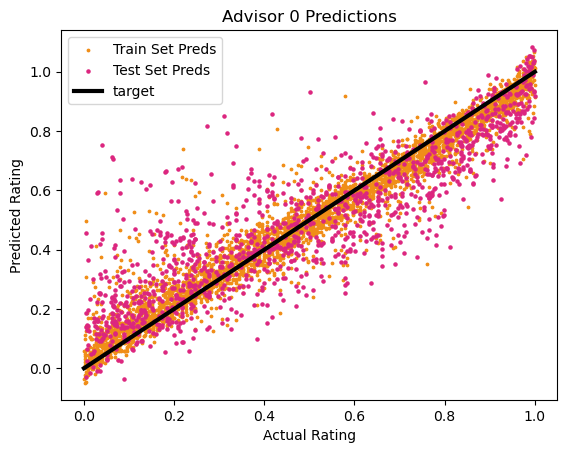

Train Set R2 score: 0.9439201576389312
Test Set R2 score: 0.7447555235647879


In [39]:
from sklearn.metrics import r2_score

preds_test = predictor.predict(grids_test)
preds_train = predictor.predict(grids_train)

def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i):
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=3, c = "#F08E18") #Train set in orange
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=5, c = "#DC267F") #Test set in magenta
    plt.plot([0,1], [0,1], label="target", linewidth=3, c="k") # Target line in Black
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Advisor {i} Predictions")
    plt.legend()
    plt.show()
    print(f"Train Set R2 score: {r2_score(ratings_train, preds_train)}") #Calculate R2 score
    print(f"Test Set R2 score: {r2_score(ratings_test, preds_test)}")
plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, 0)

In [40]:
# # Now we build the neighbor sum for all the grids
# n=grids.shape[0]
# print(n)
# distances_full = np.zeros((n, distances_flatten.shape[0]))

# for i in range(n):
#   assignments, distances, distances_flatten = calculate_distances_to_neighbors(grid_size, num_districts, grids[i])
#   # One list of size 245
#   distances_flatten = distances_flatten.flatten()
#   for j in range(distances_flatten.shape[0]):
#     distances_full[i][j] = distances_flatten[j]

# print(distances_full.shape)

In [41]:
# Tiles_sum for all the grids
tiles_sum_full = sum_tiles(grids)
# park_clusters_sum for all the grids
park_clusters_sum_full = district_clusters(grids, district=3)
# park_clusters_sum for all the grids
residential_clusters_sum_full = district_clusters(grids, district=0)

avg_dist_residential_all_full = avg_dist_res_all(grids)

# resident_ratio_all_full = get_district_resident_ratio(grids)

A little function to get all the predictions for the dataset, but overwrite the prediction for the datapoints where the ground truth value is known.

In [42]:
print(np.shape(grids))
print(np.shape(ratings[:,0]))

(500000, 7, 7)
(500000,)


In [43]:
def get_predictions(grids, ratings, predictor):
    grids = grids.reshape(grids.shape[0], 49)
    # grids = np.concatenate((grids, distances_full), axis=1)
    grids = np.concatenate((grids, tiles_sum_full), axis=1)
    grids = np.concatenate((grids, park_clusters_sum_full), axis=1)
    grids = np.concatenate((grids, residential_clusters_sum_full), axis=1)
    grids = np.concatenate((grids, avg_dist_residential_all_full), axis=1)
    # grids = np.concatenate((grids, resident_ratio_all_full), axis=1)
    
    grids_df = pd.DataFrame(grids, columns = range(grids.shape[1]))
    predictions = predictor.predict(grids_df).values
    mask = np.where(~np.isnan(ratings))
    predictions[mask] = ratings[mask]
    return predictions
predictions = get_predictions(grids, ratings[:,0], predictor)

c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)


In [44]:
predictions.shape

(500000,)

Let's compile all of that into a single functon then loop over the four advisors to get a set of predictions for all of them:

In [45]:
def fit_plot_predict(grids, ratings, i):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,i]) #gets subset of the dataset rated by advisor 0
    grids_subset = grids_subset.reshape(grids_subset.shape[0], 49)

    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_subset, ratings_subset)
    grids_train = pd.DataFrame(grids_train, columns = range(grids_subset.shape[1]), dtype = "object") #specify dtype of object to ensure categorical handling of data
    grids_test = pd.DataFrame(grids_test, columns = range(grids_subset.shape[1]), dtype = "object")
    preds_train = pd.DataFrame(ratings_train, columns = ["ratings"])
    all_train = pd.concat([grids_train, preds_train], axis=1)

    predictor = TabularPredictor(label="ratings").fit(all_train, hyperparameters = {'NN_TORCH':{}, 'GBM':{}, 'RF':{}, 'XT':{}, 'KNN':{}})

    preds_test = predictor.predict(grids_test)
    preds_train = predictor.predict(grids_train)
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, i)
    predictions = get_predictions(grids, ratings[:,i], predictor)
    return predictions, predictor

No path specified. Models will be saved in: "AutogluonModels\ag-20231030_012521"
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\core\utils\utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231030_012521"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   249.55 GB / 314.57 GB (79.3%)
Train Data Rows:    3748
Train Data Columns: 49
Label Column: ratings
Preprocessing data ...
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\core\utils\utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

[1000]	valid_set's rmse: 0.140337
[2000]	valid_set's rmse: 0.14008
[3000]	valid_set's rmse: 0.140057


	-0.14	 = Validation score   (-root_mean_squared_error)
	2.67s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForest ...
	-0.2517	 = Validation score   (-root_mean_squared_error)
	1.64s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTrees ...
	-0.2504	 = Validation score   (-root_mean_squared_error)
	1.12s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.0566	 = Validation score   (-root_mean_squared_error)
	69.89s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-0.0566	 = Validation score   (-root_mean_squared_error)
	0.08s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 76.26s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20231030_012521")
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\f

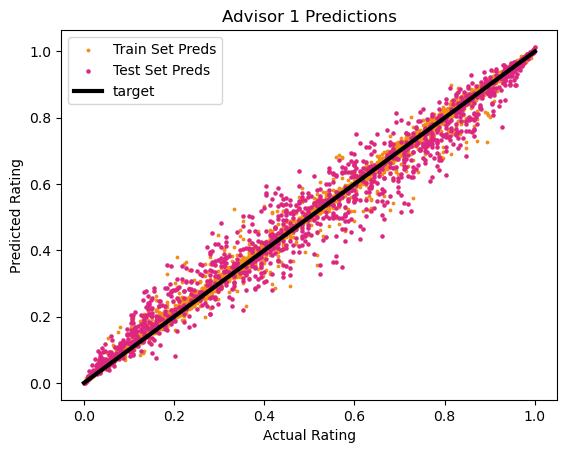

Train Set R2 score: 0.9934303682162486
Test Set R2 score: 0.9600983295519868


c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)
No path specified. Models will be saved in: "AutogluonModels\ag-20231030_012645"
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\core\utils\utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231030_012645"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform

[1000]	valid_set's rmse: 0.252577


	-0.2804	 = Validation score   (-root_mean_squared_error)
	1.65s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTrees ...
	-0.2776	 = Validation score   (-root_mean_squared_error)
	1.09s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.2757	 = Validation score   (-root_mean_squared_error)
	6.41s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-0.2521	 = Validation score   (-root_mean_squared_error)
	0.07s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 10.8s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20231030_012645")
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False

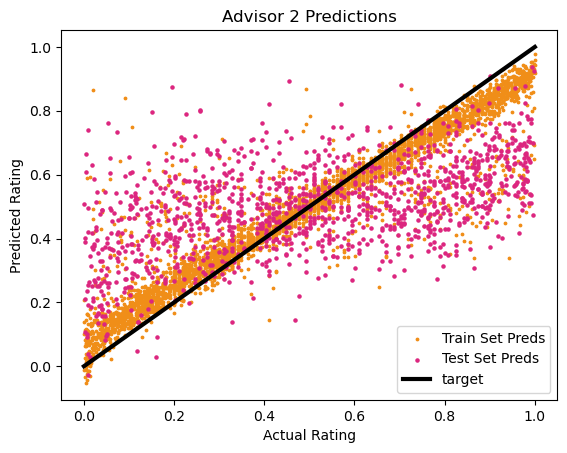

Train Set R2 score: 0.8675704149949083
Test Set R2 score: 0.2682435263885826


c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)
No path specified. Models will be saved in: "AutogluonModels\ag-20231030_012707"
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\core\utils\utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231030_012707"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform

[1000]	valid_set's rmse: 0.198827


	-0.1986	 = Validation score   (-root_mean_squared_error)
	1.46s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForest ...


[2000]	valid_set's rmse: 0.198648


	-0.2656	 = Validation score   (-root_mean_squared_error)
	1.68s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTrees ...
	-0.2657	 = Validation score   (-root_mean_squared_error)
	1.09s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.2022	 = Validation score   (-root_mean_squared_error)
	13.72s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-0.1866	 = Validation score   (-root_mean_squared_error)
	0.07s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 18.86s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20231030_012707")
c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=Fal

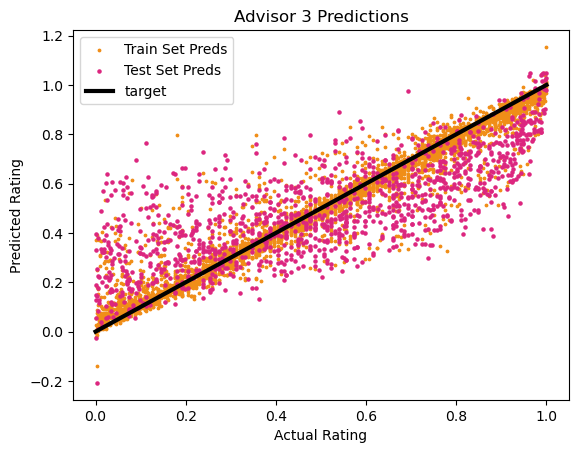

Train Set R2 score: 0.923052306996693
Test Set R2 score: 0.5546697174331778


c:\Users\pitipatw\miniconda3\envs\cp2\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)


In [46]:
# It crashes at the end
all_predictions = [predictions]
all_predictors = [predictor]
for i in range(1,4): #error: for i in range(4) to include the 4 advisors
    predictions, predictor = fit_plot_predict(grids, ratings, i)
    all_predictions.append(predictions)
    all_predictors.append(predictor)

We stack the predictions together and identify the lowest advisor score for each design. According to the regressors in the starting notebook, it's quite possible that none of the designs in the dataset are predicted to satisfy all four advisors with scores above 0.9 across the board. This is a problem! Despite this, we indentify the 100 designs with the highest minimum score and submit those.

In [47]:
final_prediction_array = np.stack(all_predictions).T
min_predictions = np.min(final_prediction_array, axis=1)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.85)}")
print(f"best predicted scores: {final_prediction_array[np.argmax(min_predictions)]}")
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)

Number of valid grids (as predicted): 0
best predicted scores: [0.8240059 0.9753479 0.8275695 0.8647675]


We visualize the score histograms and the grids of the top 10 designs.

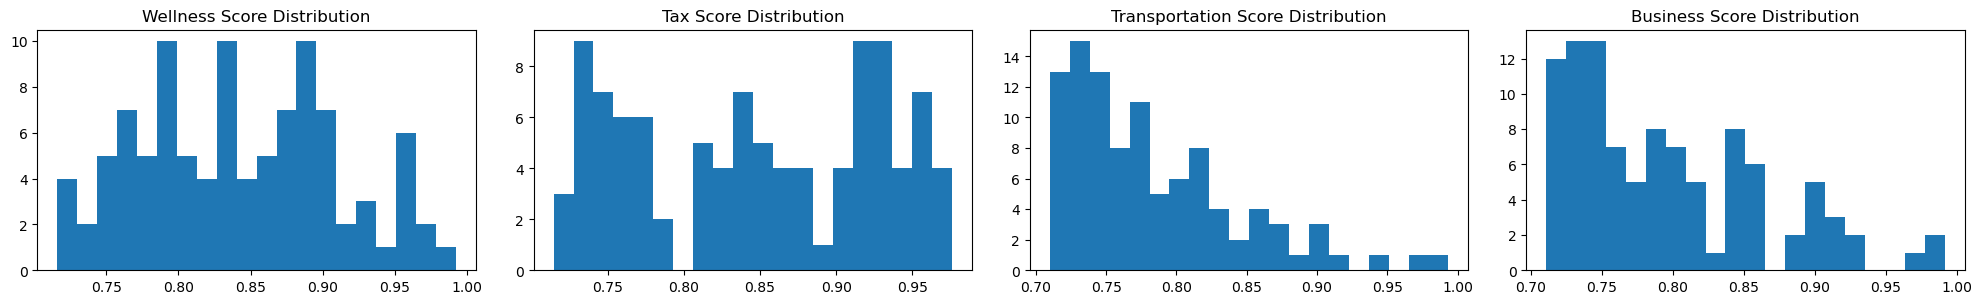

In [48]:
plot_ratings_histogram(final_prediction_array[top_100_indices])

<Figure size 640x480 with 0 Axes>

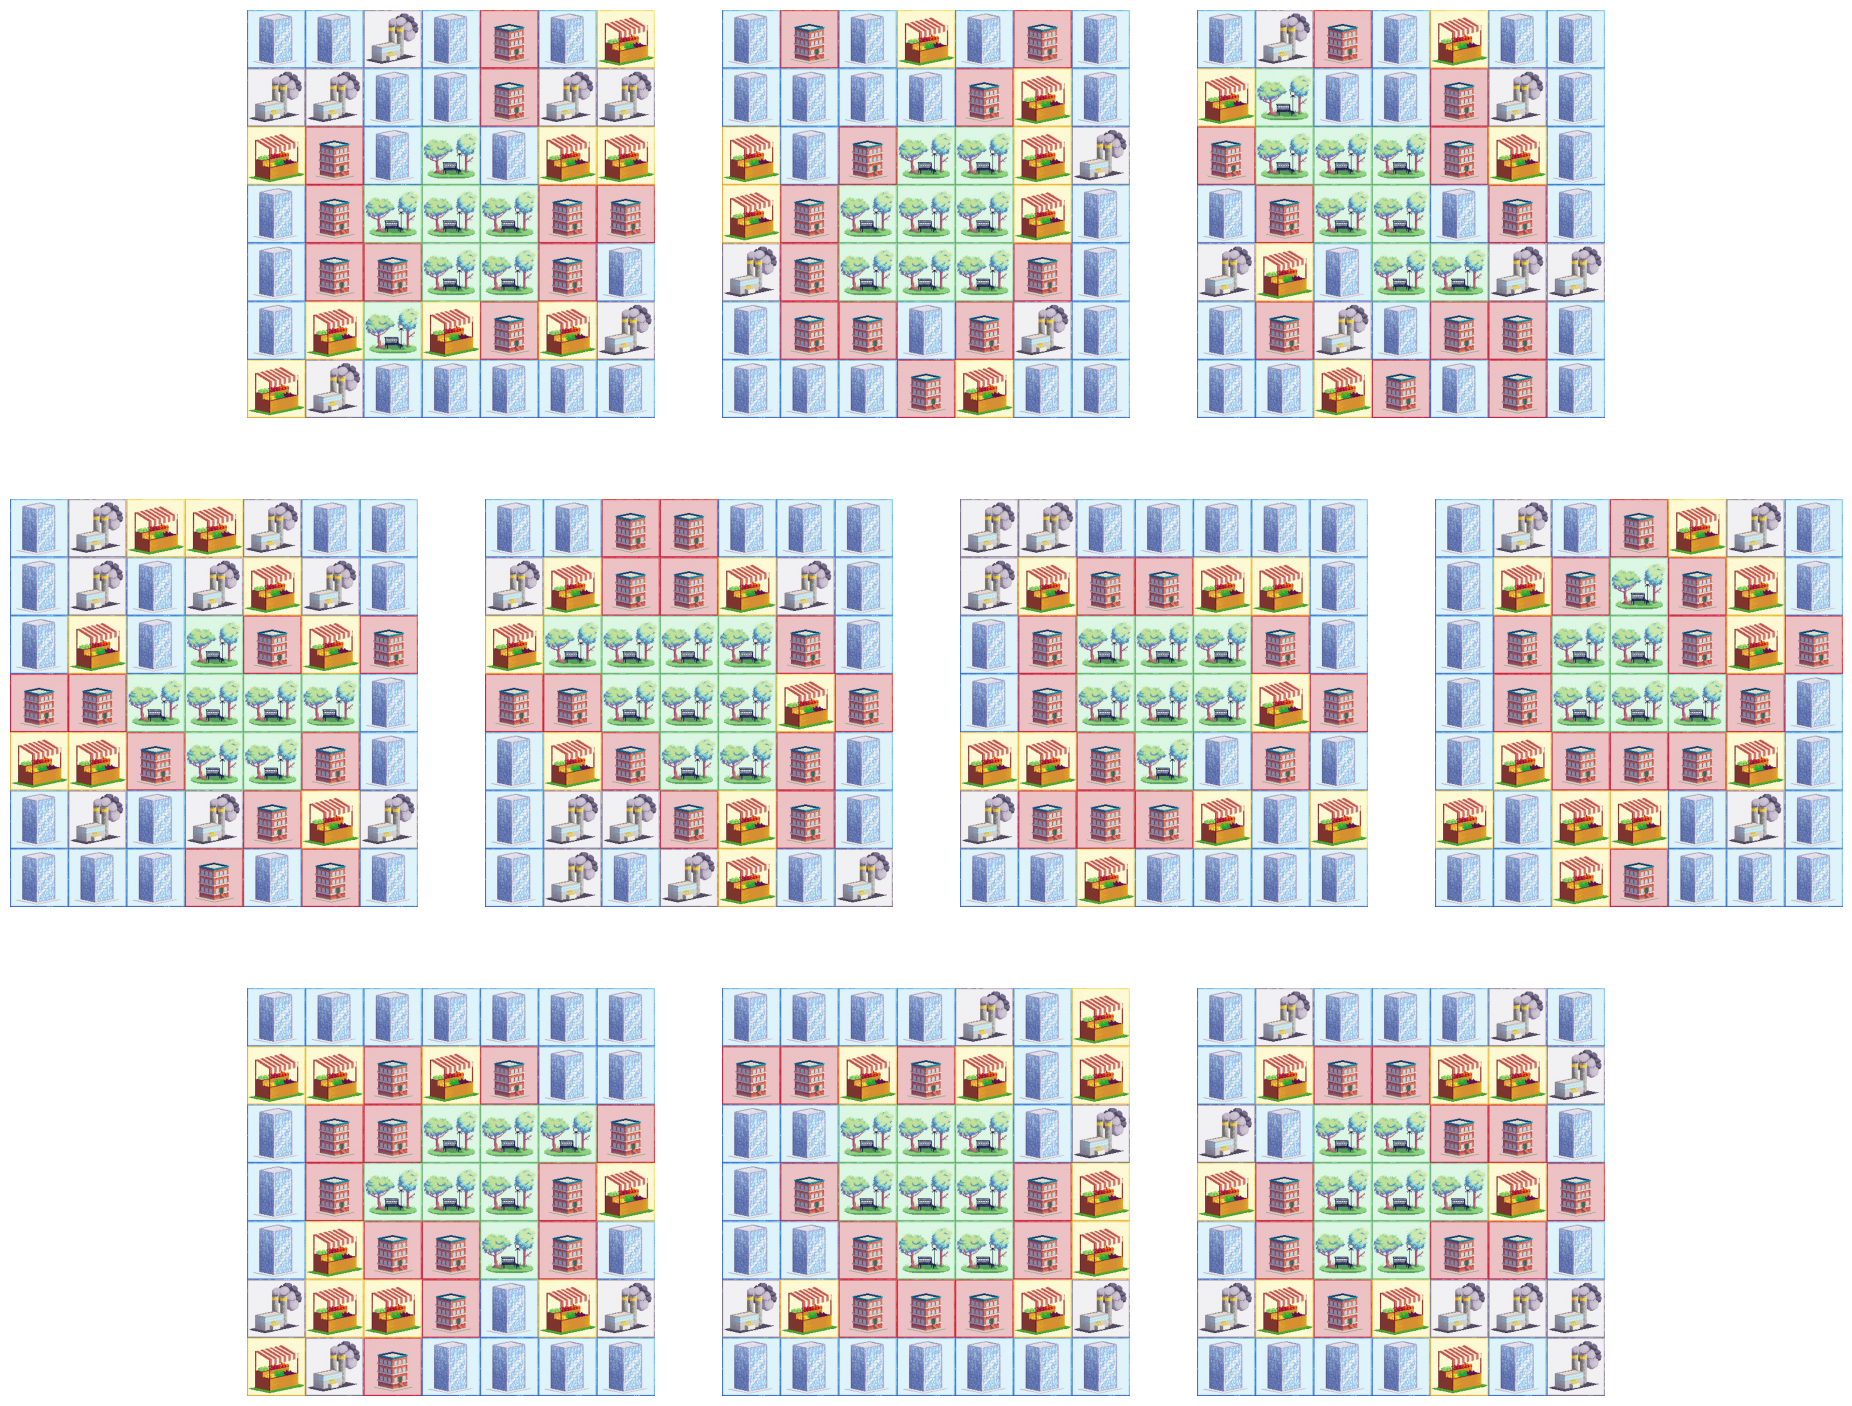

In [49]:
plot_n_grids(grids[top_100_indices][-10:])

### Preparing a submission
Let's prepare a submission. We expect the final submission to be a 100x7x7 numpy array of integers between 0 and 4, inclusive. Note: we do NOT need your predicted scores. We will ask the advisors to score your submissions directly!
You can verify that your submission is formatted properly with the following asserts:

In [267]:
final_submission = grids[top_100_indices].astype(int)

In [268]:
diversity_score(final_submission)

0.5516141001855288

In [269]:
assert final_submission.shape == (100, 7, 7)
assert final_submission.dtype == int
assert np.all(np.greater_equal(final_submission, 0) & np.less_equal(final_submission, 4))

We need each submission to have a unique submission ID for scoring. Generate a random ID and save the file using that ID:

In [45]:
id = np.random.randint(1e8, 1e9-1)
np.save(f"{id}.npy", final_submission)


You can download the file from colab in the filetree found in the side panel:

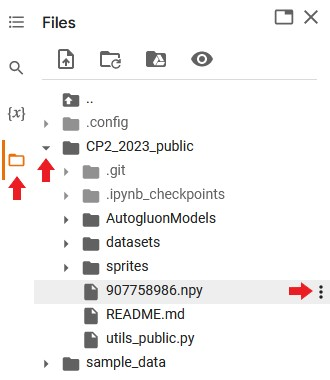

## Bonus: Training a Generative Model

You may also want to train a generative model to create new grid designs to supplement the options provided from the mayor. You may find that randomly generated designs don't tend to perform very well. Here, we have provided a simple Variational Autoencoder implementation, which can be used to synthesize new grids.

In [ ]:
grids_OH = (np.arange(5) == grids[...,None]).astype(int) #One-hot encode grids
print(grids_OH.shape)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

class VAE(nn.Module): #Create VAE class inheriting from pytorch nn Module class
    def __init__(self, input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride):
        super(VAE, self).__init__()

        # Create encoder model
        self.encoder = Encoder(input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride)

        #Create decoder after calculating input size for decoder
        decoder_input_size = self.calculate_decoder_input_size(image_size, num_layers, kernel_size, stride)
        self.decoder = Decoder(input_channels, hidden_size, num_layers, latent_dim, decoder_input_size, kernel_size, stride)

    def calculate_decoder_input_size(self, image_size, num_layers, kernel_size, stride):
        #Function to calculate the input size of the decoder given its architecture
        h, w = image_size
        for _ in range(num_layers):
            h = (h - kernel_size) // stride + 1
            w = (w - kernel_size) // stride + 1
        return h, w

    def reparameterize(self, mu, logvar):
        #Sample from gaussian
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        #Pass through encoder, reparameterize using mu and logvar as given by the encoder, then pass through decoder
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

class Encoder(nn.Module): #Encoder model of VAE
    def __init__(self, input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride):
        super(Encoder, self).__init__()

        layers = []
        h, w = image_size
        in_channels = input_channels
        for _ in range(num_layers): # Loop over layers, adding conv2d, layernorm, and relu.
            h = (h - kernel_size) // stride + 1 #Update h and w to compensate for previous layers output
            w = (w - kernel_size) // stride + 1
            layers.append(
                nn.Sequential(
                    nn.Conv2d(in_channels, hidden_size, kernel_size, stride),
                    nn.LayerNorm([hidden_size, h, w]),
                    nn.ReLU()
                )
            )
            in_channels = hidden_size #Input channels to later conv layers will just be the hidden size

        self.conv_layers = nn.ModuleList(layers) #Collect convolution layers and layernorm in conv_layers object
        self.final_flatten_size = h * w * hidden_size #Calculate size of final FC output layer
        self.fc_mu = nn.Linear(self.final_flatten_size, latent_dim) #Final FC layer to output mean
        self.fc_logvar = nn.Linear(self.final_flatten_size, latent_dim) #Final FC layer to output logvar

    def forward(self, x): #Forward call for encoder
        for layer in self.conv_layers: #Call conv layers sequentially
            x = layer(x)
        x = x.view(x.size(0), -1) #Flatten x
        mu = self.fc_mu(x) #Get mu and logvar from FC layers
        logvar = self.fc_logvar(x)
        return mu, logvar #Return mu and logvar

class Decoder(nn.Module):  #Decoder model of VAE
    def __init__(self, output_channels, hidden_size, num_layers, latent_dim, decoder_input_size, kernel_size, stride):
        super(Decoder, self).__init__()
        self.decoder_input_size = decoder_input_size
        self.hidden_size = hidden_size

        #Initial fully connected layer
        self.fc = nn.Linear(latent_dim, hidden_size * decoder_input_size[0] * decoder_input_size[1])
        layers = []
        h, w = decoder_input_size
        for _ in range(num_layers-1): # Loop over layers, adding conv2dtranspose, layernorm, and relu.
            h = (h - 1) * stride + kernel_size #Update h and w to compensate for previous layers output
            w = (w - 1) * stride + kernel_size
            layers.append(
                nn.Sequential(
                    nn.ConvTranspose2d(hidden_size, hidden_size, kernel_size, stride),
                    nn.LayerNorm([hidden_size, h, w]),
                    nn.ReLU()
                )
            )

        self.deconv_layers = nn.ModuleList(layers) #Collect deconv layers

        #Final layer brings the image to the original size
        self.final_layer = nn.ConvTranspose2d(hidden_size, output_channels, kernel_size, stride)

    def forward(self, z):
        z = self.fc(z) #Call initial FC layer
        z = z.view(z.size(0), self.hidden_size, self.decoder_input_size[0], self.decoder_input_size[1])  # Reshape to match the deconvolution input shape
        for layer in self.deconv_layers: #Sequentially call deconv layers
            z = layer(z)
        z = self.final_layer(z)
        return torch.sigmoid(z) #Final sigmoid layer

def loss_function(recon_x, x, mu, logvar):
    # VAE loss is a sum of KL Divergence regularizing the latent space and reconstruction loss
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum') # Reconstruction loss from Binary Cross Entropy
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) #KL Divergence loss
    return BCE + KLD

def train(epoch, data_tensor): #Train function for one epoch of training
    model.train()
    train_loss = 0
    num_batches = len(data_tensor) // batch_size

    #Tqdm progress bar object contains a list of the batch indices to train over
    progress_bar = tqdm(range(num_batches), desc='Epoch {:03d}'.format(epoch), leave=False, disable=False)

    for batch_idx in progress_bar: #Loop over batch indices
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size
        data = data_tensor[start_idx:end_idx] #Gather corresponding data

        optimizer.zero_grad() #Set up optimizer
        recon_batch, mu, logvar = model(data) #Call model
        loss = loss_function(recon_batch, data, mu, logvar) #Call loss function
        loss.backward() #Get gradients of loss
        train_loss += loss.item() #Append to total loss
        optimizer.step() #Update weights using optimizeer

        # Updating the progress bar
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item())})

    average_train_loss = train_loss / len(data_tensor) #Calculate average train loss
    tqdm.write('Epoch: {} \tTraining Loss: {:.3f}'.format(epoch, average_train_loss))

Let's set up our data. We will onehot-encode the data so that each grid is a 5x7x7 tensor of booleans.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Check if gpu is available, otherwise use cpu

grids_oh = (np.arange(5) == grids[...,None]).astype(int) # Onehot encode
grids_tensor = torch.from_numpy(grids_oh) # Torch tensor from numpy
grids_tensor = grids_tensor.permute(0, 3, 1, 2) # Reshape to organize data by [batch, district, x, y]
grids_tensor = grids_tensor.float() # Ensure we are using floats
grids_tensor = grids_tensor.to(device) # Send the tensor to device

We set up a model:

In [ ]:
#Keep fixed for 7x7 grid with 5 district options
input_channels = 5
image_size = (7, 7)

#Can tune these parameters
latent_dim = 20
hidden_size = 128
num_layers = 2
kernel_size = 3
stride = 1
num_epochs = 60
batch_size = 1024

model = VAE(input_channels, hidden_size, num_layers, latent_dim, image_size, kernel_size, stride).to(device) #Instantiate the VAE
optimizer = optim.Adam(model.parameters(), lr=1e-3) #Instantiate the Optimizer

#Let's look at a model summary
from torchsummary import summary
summary(model, input_size=(input_channels, image_size[0], image_size[1]))

Time to train!

In [ ]:
# Main loop
for epoch in range(1, num_epochs + 1): #Loop over num_epochs
    train(epoch, grids_tensor) #Call train function for each epoch

Let's take a look at how well out VAE is able to regenerate city designs. Remember, though, that that our VAE is generating onehot encodings. We need some method to select a district given a set of onehot-encoded values. For example, if our VAE generates [0.1, 0.4, 0.9, 0.2, 0.0] for a particular grid tile, how do we select a district? We implement two approaches. One is a simple argmax, which would deteministically select [2] (commercial) with 100% probability. We also implement a probabilistic selection approach which would select [0] with (1/16) chance, [1] with (1/4) chance, [2] with (9/16) chance, and [3] with (1/8) chance:

In [ ]:
def argmax_sample(grids): #Expects a BATCH of one-hot encoded grids (nx7x7x5)
    return torch.argmax(grids, axis=3)
def probabilistic_sample(grids): #Expects a BATCH of one-hot encoded grids (nx7x7x5)
    flattened_grids = grids.reshape(grids.shape[0]*7*7, 5)
    flattened_grids = torch.multinomial(flattened_grids, num_samples=1)
    grids = flattened_grids.reshape(grids.shape[0],7,7)
    return grids


We can test the VAE's reconstruction capabilities:

In [ ]:
def reconstruct_from_vae(model, samples, device='cpu'):
    #Function to reconstruct city grids
    with torch.no_grad(): #Faster inference if model does not need to calculate gradients
        samples = model(samples)[0] #Pass samples through VAE
        samples = samples.permute(0, 2, 3, 1) #Reshuffle dimensions to be [batch, x, y, district]
        samples = argmax_sample(samples) #Can switch to probabilistic sample
    return samples.to('cpu').numpy()

def plot_reconstruction(originals, reconstructions):
    # Function to plot reconstructed city grids alongside originals
    n = len(originals)
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(9, 4*n))
    for i in range(n): # Loop over the grids
        plot_grid_image(originals[i], on_ax=axes[i, 0]) # Plot original on the left
        plot_grid_image(reconstructions[i], on_ax=axes[i, 1]) #Plot reconstructed on the right
    fig.tight_layout()
    plt.show()

originals = np.random.choice(np.arange(len(grids)), size=5, replace=False) #Select 5 random indices
reconstructions = reconstruct_from_vae(model, grids_tensor[originals], device) #Reconstruct
plot_reconstruction(grids[originals], reconstructions) #Compare

Ok, time for the big moment! Let's generate some fresh city designs from the VAE. We will use the probabilistic sampling here, but you are free to adjust.

In [ ]:
def sample_from_vae(model, num_samples, latent_dim, device='cpu'):
    #Function to generate new samples from VAE
    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim, device=device) #Sample from N(0,1) Gaussian
        samples = model.decoder(z) #Pass noise into decoder to sample a batch of  grid
        samples = samples.permute(0, 2, 3, 1) #Reshuffle dimensions to be [batch, x, y, district]
        samples = probabilistic_sample(samples) #Can switch to argmax sample
    return samples.to('cpu').numpy()
samples = sample_from_vae(model, 7, latent_dim, device)
plot_n_grids(samples) #Plot generated grids

Let's compare the score distributions across generated samples to the dataset. For a baseline, we will also try randomly generated grids where each grid location is sampled independently and uniformly. Note: these scores are calculated according to our trained regressors and may not be perfectly accurate!

In [ ]:
generated_samples = sample_from_vae(model, 1000, latent_dim, device) #Sample from VAE
random_samples = np.random.choice(np.arange(5), size = (1000,7,7)) #Randomly Sample Grids

In [ ]:
def score_samples(samples): #Function to score all samples. Requires trained regressors in all_predictors object
    samples = samples.reshape(samples.shape[0], 49) #Reformat data into the format regressors expect
    samples = pd.DataFrame(samples, columns = range(grids_subset.shape[1]), dtype = "object")
    sample_predictions = []
    for i in range(4): #Loop over advisores
        predictor = all_predictors[i] #Select appropriate regressor
        sample_predictions.append(predictor.predict(samples)) #Call regressor
    sample_predictions = np.stack(sample_predictions).T #Stack scores together
    return sample_predictions
generated_sample_predictions = score_samples(generated_samples)
random_sample_predictions = score_samples(random_samples)

In [ ]:
import seaborn as sns
def compare_violinplots(all_predictions, all_names):
    #Wrangle dataframe predictions into the format expected by seaborn violinplot
    all_dfs = []
    for i in range(len(all_predictions)):
        df = pd.DataFrame(all_predictions[i], columns=["Wellness", "Tax", "Transportation", "Business"])
        df["Minimum Score"] = np.min(df.values, axis=1) #Calculate minimum score over the four advisors for every grid
        df = pd.melt(df, var_name = "Advisor", value_name = "Score")
        df['Method'] = all_names[i]
        all_dfs.append(df)
    all_dfs = pd.concat(all_dfs, axis=0)
    plt.figure(figsize=(10,5))

    #Plot the distributions
    sns.violinplot(x="Advisor", y="Score", hue="Method", data=all_dfs, linewidth=1, palette = ["#F08E18", "#888888", "#DC267F"])

all_predictions = [generated_sample_predictions, random_sample_predictions, final_prediction_array[:1000]] #Select only the last 1000 of the dataset for speed
all_names = ["VAE-Generated", "Random-Generated", "Dataset Subset"]
compare_violinplots(all_predictions, all_names) #Plot!

If you trained strong regressors, you should likely see that the dataset is much better performing, compared to random sampling. While the VAE may not generate quite as strong-performing designs as the dataset on average, it should generate better designs than the random sampler. Note: these observatons may not be apparant with a weak regressor.